# Unspuervised Learning 

In [13]:
# Import the need libraries:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import pandas as pd

# Import Cleaned Data from 01_data_preprocessing
X = pd.read_csv('cleaned_X.csv')
y = pd.read_csv('clean_y.csv')

In [14]:

# Scalling the Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



## K-Means Clustering

c:\Users\Mena\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Mena\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Mena\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Mena\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

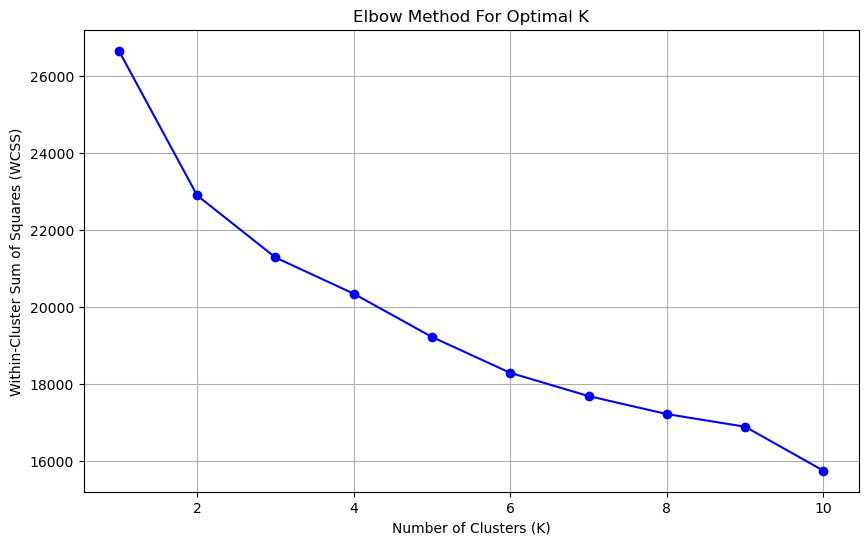

c:\Users\Mena\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


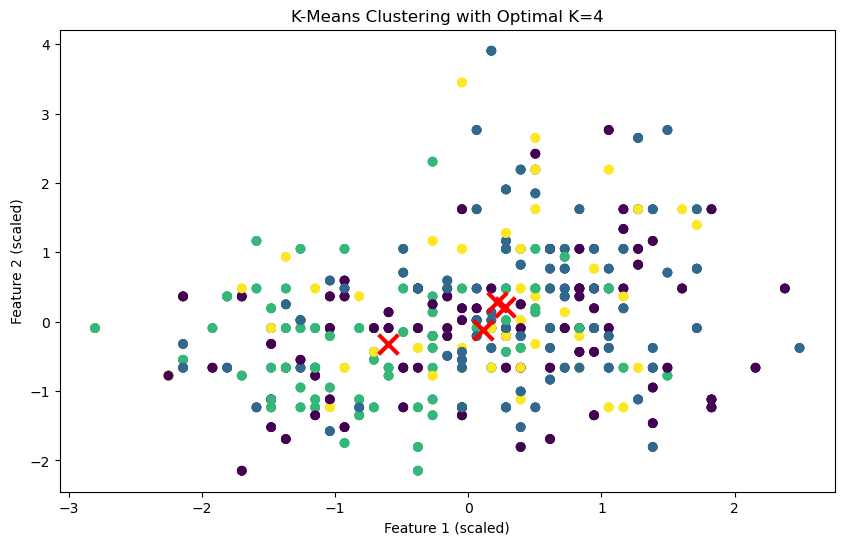

In [15]:
# Elbow Method to determine optimal K
# Range of K values to test
k_range = range(1, 11)  # Testing K from 1 to 10
wcss = []  # Within-Cluster Sum of Squares

# Calculate WCSS for each K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ gives us the WCSS

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, 'bo-')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# Based on the elbow plot, choose optimal K =4
optimal_k = 4

# Perform K-Means with optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_optimal.fit(X_scaled)

# Plot Results with optimal K
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_optimal.labels_, cmap='viridis')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], 
           marker='x', s=200, linewidth=3, color='r')
plt.title(f'K-Means Clustering with Optimal K={optimal_k}')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()


# Hierarchical Clustering


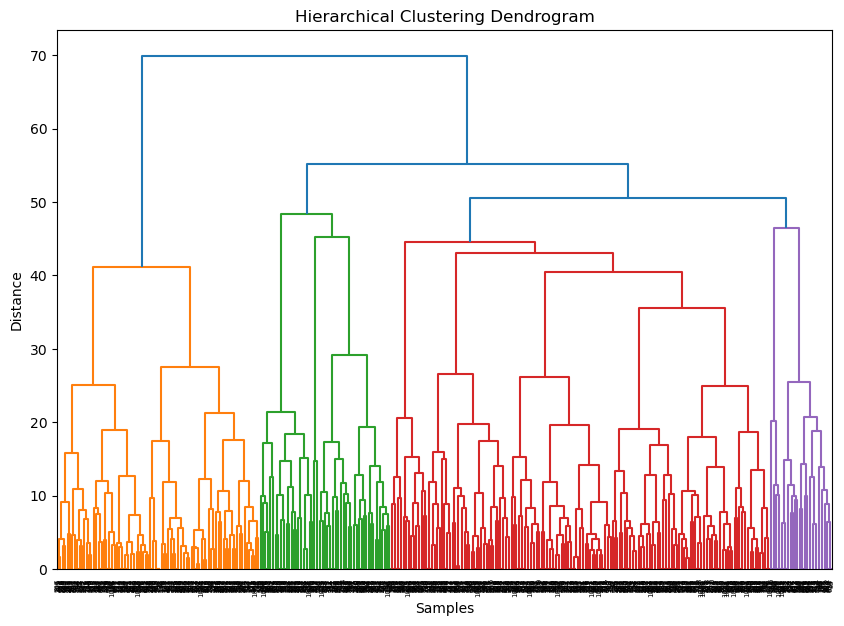

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage 

# Preform Hierarchical Clustering
linked = linkage(X_scaled, 'ward')

# Plot Resultss 
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')
plt.xlabel('Samples')
plt.show()